In [1]:
# !pip install pandas==1.5.1
# !pip install pyLDAvis==3.4.0
# !pip install gensim==4.3.1

## 1. Data Loading 

In [2]:
import pandas as pd
# df = pd.read_csv("./data/yelp_data.csv")

ca_file_path = '../data/ca_restaurants.csv'
ca_df = pd.read_csv(ca_file_path)
ca_df

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,is_restaurant
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247608,6990221,cKuP5pnvbvpn4UbaccVcdg,OVYb1El25BgVhgbXb4e-KA,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Great experience with great people who are rea...,2021-06-22 21:41:07.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y
247609,6990222,dZC87sZ1f2ntOf876_DDLg,9w5PoliouEyNikdy6DizqQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,I spent the week in Santa Barbara and had the ...,2021-06-28 23:53:44.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y
247610,6990223,NCafkcXIvK7E965my4RpQg,GmuHOkMR80oW3sAuF-UsAw,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,"Last summer, I had the pleasure of experiencin...",2021-07-06 19:15:56.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y
247611,6990224,VxsNftGxRUDZcLD0Ns1wKg,VRXPOvlSydho0tYmSseKnQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Joseph and Teresa are super hosts. You will f...,2021-07-01 03:44:10.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y


### 2. Data Exploration
Data exploration includes 2 part: 
1. Flatten attributes inside column "Attributes" to new columns for validation purpose; 
2. Check Emojis in the text column

In [3]:
#Flatten "Attributes" and add to new columns"
import ast
from pandas import json_normalize
ca_df['attributes'] = ca_df['attributes'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
#  flatten Json 
flattened_attributes = json_normalize(ca_df['attributes'])
# Combine the flattened attributes with the original DataFrame
ca_df = pd.concat([ca_df, flattened_attributes], axis=1)
for column in ['Ambience', 'GoodForMeal']:
    ca_df[column] = ca_df[column].fillna('{}')
    ca_df[column] = ca_df[column].apply(ast.literal_eval)
    flattened_attributes = json_normalize(ca_df[column])
    ca_df = pd.concat([ca_df, flattened_attributes], axis=1)
ca_df = ca_df.drop(['attributes','Ambience', 'GoodForMeal'], axis=1)
ca_df

/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,intimate,romantic,classy,upscale,dessert,latenight,lunch,dinner,brunch,breakfast
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,False,False,True,False,False,False,True,True,False,False
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,False,False,True,False,False,False,True,True,False,False
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,False,False,True,False,False,False,True,True,False,False
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,False,False,True,False,False,False,True,True,False,False
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247608,6990221,cKuP5pnvbvpn4UbaccVcdg,OVYb1El25BgVhgbXb4e-KA,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Great experience with great people who are rea...,2021-06-22 21:41:07.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247609,6990222,dZC87sZ1f2ntOf876_DDLg,9w5PoliouEyNikdy6DizqQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,I spent the week in Santa Barbara and had the ...,2021-06-28 23:53:44.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247610,6990223,NCafkcXIvK7E965my4RpQg,GmuHOkMR80oW3sAuF-UsAw,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,"Last summer, I had the pleasure of experiencin...",2021-07-06 19:15:56.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247611,6990224,VxsNftGxRUDZcLD0Ns1wKg,VRXPOvlSydho0tYmSseKnQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Joseph and Teresa are super hosts. You will f...,2021-07-01 03:44:10.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Calculate non-empty value rate for each of the column. We will take below 25% missing rate for consideration.
total_counts = ca_df.isin(['None']).sum() + ca_df.isna().sum()
non_Empty_rate = 1-total_counts/ca_df.shape[0]
non_Empty_rate

Unnamed: 0     1.000000
review_id      1.000000
user_id        1.000000
business_id    1.000000
stars_x        1.000000
                 ...   
latenight      0.653992
lunch          0.609847
dinner         0.682266
brunch         0.551207
breakfast      0.619564
Length: 74, dtype: float64

In [5]:
%%time
import emot
emot_obj = emot.core.emot()
emojis = []
for text in ca_df['text']:
    emos = emot_obj.emoji(text)
    if len(emos.get('value')) >= 1:
        print(emos.get('value'))
    else:
        emojis.append(None)

['‼']
['™']
['‼']
['‼']
['‼']
['®']
['‼']
['®']
['‼']
['™']
['‼', '‼']
['‼']
['™']
['‼', '‼', '‼']
['‼']
['‼', '‼']
['‼']
['™']
['‼']
['‼']
['‼', '‼']
CPU times: user 2min 56s, sys: 314 ms, total: 2min 56s
Wall time: 2min 57s


In our sentiment analysis, we took into consideration the handling of emojis. Emojis, to some extent, convey emotions, so we believed they could help on our analysis. However, during the initial processing, we only catched :bangbang:, ®, ™. Emojis observed didn't contribute significantly to expressing emotions. Therefore, in this analysis, we chose to filter out emojis as they were not deemed impactful.

### 3.Data pre-processing
Text need to consider some cases. We will perform the following steps: 
###### 1). To Lower Case
###### 2). Tokenization 
###### 3). Remove Stopwords 
###### 4). Remove URL, Emails, Special Chars
###### 5). Stemming/Lemmatization
###### 6). Replace food related entities (sushi, roll, ) by a gernal word 'food'. 

In [6]:
%%time
from gensim.parsing.preprocessing import preprocess_string
# This method from gensim automatically does the 5 steps above. Note this method also remove Emoji.
ca_df['tokens'] = ca_df['text'].apply(lambda x :preprocess_string(x) ) # This method automatically does the 5 steps above
ca_df.head()

CPU times: user 33.4 s, sys: 126 ms, total: 33.5 s
Wall time: 33.7 s


,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,romantic,classy,upscale,dessert,latenight,lunch,dinner,brunch,breakfast,tokens
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,False,True,False,False,False,True,True,False,False,"[parti, hibachi, waitress, brought, separ, sus..."
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,False,True,False,False,False,True,True,False,False,"[sat, half, hour, miso, drink, serv, wait, act..."
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,False,True,False,False,False,True,True,False,False,"[bad, sushi, roll, good, option, limit, hibach..."
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,False,True,False,False,False,True,True,False,False,"[picki, come, sushi, qualiti, fish, ingredi, i..."
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,False,True,False,False,False,True,True,False,False,"[sushi, master, actual, asian, good, sushi, pr..."


### 4.LDA and NMF Topic Modelling

For LDA and NMF model, we do 4 steps for each model. 1) Create dictionary and corpus for model; 2) build Model 3) plot Coherence plot for different topic number to find optimal topic number; 4) Combined with topic number and extracted topics, find optimized model. 5) Visualize the topics

In [7]:
import gensim
from gensim.models.ldamulticore import LdaMulticore

random_state = 42


# Step 1: Create Dictionary and Bow Corpus
dictionary = gensim.corpora.Dictionary(ca_df['tokens'])
#filter extreme conditions
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in ca_df['tokens']]

# Step 2: Build Topic Model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=dictionary,
#                                        num_topics=15, 
#                                        random_state=random_state,
#                                        chunksize=2000,
#                                        passes=20,
#                                        workers=3)



In [8]:
# Step 3: Find the Optimal Number of Topics
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from scipy.sparse import csc_matrix
from tqdm import tqdm

def compute_coherence_values(modelname, dictionary, corpus, texts, start, limit, step):
    """
    helper function
    return 2 lists: 1. list for model; 2. list for coherence vaules
    """
    coherence_values = []
    model_list = []
    # Initialize tqdm progress bar
    pbar = tqdm(range(start, limit, step), desc=f'Computing coherence for {modelname}')
    
    for num_topics in pbar:  # Iterate over topics with tqdm progress bar
        if modelname == "LDA":
            cur_model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                         num_topics=num_topics,
                         random_state=random_state,
                         chunksize=2000,
                         passes=20,
                         workers=3)
        elif modelname == 'NMF':
            if isinstance(corpus, csc_matrix):  # Check with csc_matrix
                cur_model = Nmf(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics,
                            random_state=random_state,
                            chunksize=2000,
                            passes=20)
            else:
                cur_model = Nmf(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics,
                            random_state=random_state,
                            chunksize=2000,
                            passes=20)
        model_list.append(cur_model)
        coherencemodel = CoherenceModel(model=cur_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
        # Update tqdm progress bar description
        pbar.set_description(f'Computing coherence for {modelname}, Num Topics: {num_topics}')

    return model_list, coherence_values

def plot_coherences_topics(modelName, start, limit, step, model_list, coherence_values):
    """
    Create a plot as shown above of coherence for the topic models created with num_topics
    """
    for m, cv in zip(range(start, limit, step), coherence_values):
        print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
    # Select the model and number of topics with the highest coherence score
    max_coherence_value = max(coherence_values)
    optimal_index = coherence_values.index(max_coherence_value)
    optimal_model = model_list[optimal_index]
    optimal_num_topics = optimal_index*step + start
    print("Optimal Number of Topics:", optimal_num_topics)
    
    # Step 4: Print the Topics of the Optimal Model
    topics = optimal_model.print_topics(num_words=15)
    for topic in topics:
        print(topic)
    x = range(start, limit, step)  # Number of topics
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.title("Coherence Score vs Number of Topics for " + modelName + " model")
    plt.xticks(x)  # Show all the x-ticks (number of topics)
    plt.show()

When choosing the number of topics for LDA or NMF model, it's important to consider both the coherence scores and domain knowledge or human intuition. From the review dataset, we know there are multiple aspects to talk about. Therefore, I prefer a larger topic number rather than a smaller one. Let try to plot the coherence scores from 10 to 30 topics

#### LDA model

Let's find the optimal topic number by coherence score

In [9]:
LDA_model_list, LDA_coherence_values = compute_coherence_values(modelname="LDA", dictionary=dictionary, corpus=corpus, texts=ca_df['tokens'], start=10, limit=30, step=2)

Computing coherence for LDA, Num Topics: 28: 100%|██████████| 10/10 [32:45<00:00, 196.54s/it]


Num Topics = 10  has Coherence Value of 0.4659
Num Topics = 12  has Coherence Value of 0.488
Num Topics = 14  has Coherence Value of 0.4983
Num Topics = 16  has Coherence Value of 0.5093
Num Topics = 18  has Coherence Value of 0.5193
Num Topics = 20  has Coherence Value of 0.5193
Num Topics = 22  has Coherence Value of 0.4939
Num Topics = 24  has Coherence Value of 0.5174
Num Topics = 26  has Coherence Value of 0.5343
Num Topics = 28  has Coherence Value of 0.5186
Optimal Number of Topics: 26
(10, '0.123*"fri" + 0.112*"burger" + 0.024*"dog" + 0.023*"onion" + 0.017*"mesa" + 0.017*"chees" + 0.015*"ring" + 0.015*"bun" + 0.014*"hot" + 0.011*"order" + 0.011*"good" + 0.011*"baklava" + 0.010*"sweet" + 0.010*"potato" + 0.009*"scott"')
(13, '0.080*"santa" + 0.077*"breakfast" + 0.077*"barbara" + 0.045*"egg" + 0.028*"brunch" + 0.025*"toast" + 0.018*"french" + 0.013*"bacon" + 0.013*"potato" + 0.012*"pancak" + 0.012*"benedict" + 0.011*"morn" + 0.009*"order" + 0.009*"best" + 0.008*"sundai"')
(0, '0.

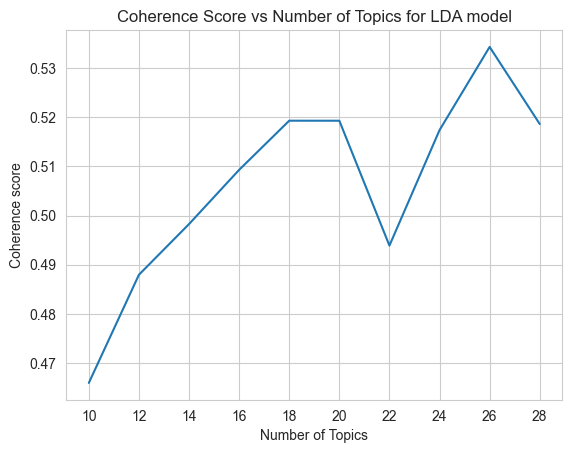

In [10]:
plot_coherences_topics("LDA", 10, 30, 2, LDA_model_list, LDA_coherence_values)

---------------------------------------------
We extract the topics names by chatGPT and validated by manually inspection
Here is the topic name for topics:
Topic 4: Barbecue and Meat Dishes
Topic 2: Hotel and Accommodation
Topic 8: Restaurant and **Dining Experience**
Topic 3: Bars and **Nightlife**
Topic 9: Disappointing **Food and Service**
Topic 19: **Celebrations and Events**
Topic 23: Asian Cuisine
Topic 1: **Great Food and Service** in Santa Barbara
Topic 21: Mexican Cuisine
Topic 14: Sandwiches and Salads
Topic 5: **Fine Dining**
Topic 12: **Vegan and Health-Conscious Options**
Topic 17: Customer Service Issues
Topic 18: Local Businesses and Markets
Topic 15: **Outdoor Seating and Parking**
Topic 24: **Good Food and Value**
Topic 11: Desserts and Sweets
Topic 20: Wine Tasting and Tours
Topic 16: Sushi and Japanese Cuisine
Topic 0: **Seafood and Ocean Views**
--------------------------------------------------
The aspects are able to extracted are highlighted by bold. Rest of topics are more about a specific cuisine. Like BBQ, Mexican cuisine, Pizza. To resolve the problem topics are more cuisine oriented, we replace words around Cuisines by a general word "food"

In [11]:
%time
# to resolve the problem topics are more cuisine oriented, we replace words around Cuisines by a general word "food"
food_labels_set = ['fish', "sushi", "roll", "seafood", "crab", "fresh", "shrimp", "lobster" , "clam", "taco", "burrito", "salsa", "mexican","indian", "chip", "pizza", "vegan", "chicken", "sandwich", "fri", "burger", "salad", "chees","bread", "donut", "chocol", "coffe", "ic", "cream" , "salmon", "ahi", "ramen", "octopu", "egg", "toast", "potato", "bacon",  "pancak", "meat", "grill", "hibachi", "wing","pork","steak", "rib","chowder", "oyster"]
ca_df['tokens_removed_labels'] = ca_df['tokens'].apply(lambda x: [word if word not in food_labels_set else "food" for word in x])
ca_df.head()

CPU times: user 3 µs, sys: 12 µs, total: 15 µs
Wall time: 3.1 µs


,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,classy,upscale,dessert,latenight,lunch,dinner,brunch,breakfast,tokens,tokens_removed_labels
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,True,False,False,False,True,True,False,False,"[parti, hibachi, waitress, brought, separ, sus...","[parti, food, waitress, brought, separ, food, ..."
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,True,False,False,False,True,True,False,False,"[sat, half, hour, miso, drink, serv, wait, act...","[sat, half, hour, miso, drink, serv, wait, act..."
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,True,False,False,False,True,True,False,False,"[bad, sushi, roll, good, option, limit, hibach...","[bad, food, food, good, option, limit, food, f..."
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,True,False,False,False,True,True,False,False,"[picki, come, sushi, qualiti, fish, ingredi, i...","[picki, come, food, qualiti, food, ingredi, im..."
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,True,False,False,False,True,True,False,False,"[sushi, master, actual, asian, good, sushi, pr...","[food, master, actual, asian, good, food, pric..."


Do the main four steps for the post-processed tokens instead of tokens

In [12]:
import gensim
from gensim.models import Nmf
from gensim.corpora.dictionary import Dictionary
#1.Create Dictionary and Bow Corpus for post-processed text
# Create a corpus from a list of texts
dictionary_removed_labels = gensim.corpora.Dictionary(ca_df['tokens_removed_labels'])
#filter extreme conditions
dictionary_removed_labels.filter_extremes(no_below=5, no_above=0.5)
corpus_removed_labels = [dictionary_removed_labels.doc2bow(text) for text in ca_df['tokens_removed_labels']]


In [13]:

LDA_model_list, LDA_coherence_values = compute_coherence_values(modelname="LDA",dictionary=dictionary_removed_labels, corpus=corpus_removed_labels, texts=ca_df['tokens_removed_labels'], start=18, limit=31, step=1)

Computing coherence for LDA, Num Topics: 30: 100%|██████████| 13/13 [43:15<00:00, 199.66s/it]


Num Topics = 18  has Coherence Value of 0.4891
Num Topics = 19  has Coherence Value of 0.5044
Num Topics = 20  has Coherence Value of 0.4858
Num Topics = 21  has Coherence Value of 0.5279
Num Topics = 22  has Coherence Value of 0.4892
Num Topics = 23  has Coherence Value of 0.4953
Num Topics = 24  has Coherence Value of 0.4956
Num Topics = 25  has Coherence Value of 0.5172
Num Topics = 26  has Coherence Value of 0.5156
Num Topics = 27  has Coherence Value of 0.5009
Num Topics = 28  has Coherence Value of 0.5085
Num Topics = 29  has Coherence Value of 0.5126
Num Topics = 30  has Coherence Value of 0.503
Optimal Number of Topics: 21
(16, '0.183*"santa" + 0.173*"barbara" + 0.035*"best" + 0.029*"restaur" + 0.023*"visit" + 0.017*"favorit" + 0.011*"local" + 0.011*"place" + 0.010*"trip" + 0.010*"stop" + 0.010*"san" + 0.009*"year" + 0.009*"area" + 0.009*"gem" + 0.009*"live"')
(20, '0.061*"street" + 0.057*"park" + 0.053*"locat" + 0.044*"state" + 0.020*"lot" + 0.017*"walk" + 0.015*"right" + 0.01

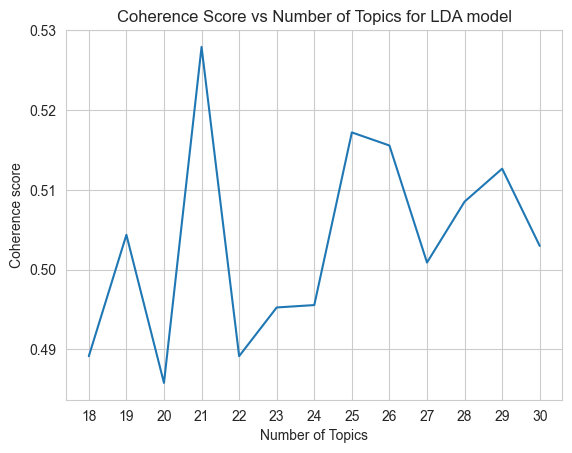

In [14]:
plot_coherences_topics("LDA", 18, 31, 1, LDA_model_list, LDA_coherence_values)

In [21]:
# Mannually inspect several topic, see which topic number make more sense to human 
LDA_topic_num_list = [ 21, 25, 26, 29]
for idx in LDA_topic_num_list:
    model = LDA_model_list[idx - 18]
    print("="*20)
    print("Topic Number: ", idx)
    sorted_topics = sorted(model.print_topics(num_words=15), key=lambda x: x[0])

# Print the sorted topics
#     for topic in sorted_topics:
#         print(topic)

Topic Number:  21
Topic Number:  25
Topic Number:  26
Topic Number:  29


In [22]:
# by inspection, we take topic number 29 for the optimal model
LDA_optimal_model = LDA_model_list[29 - 18]
LDA_optimal_model.top_topics(corpus_removed_labels)

[([(0.04540028, 'seat'),
   (0.039994143, 'outsid'),
   (0.037615187, 'patio'),
   (0.03001316, 'nice'),
   (0.029217446, 'tabl'),
   (0.026431149, 'outdoor'),
   (0.024730315, 'insid'),
   (0.024554715, 'sit'),
   (0.02316304, 'place'),
   (0.020109687, 'area'),
   (0.014455401, 'great'),
   (0.0133579355, 'love'),
   (0.013217987, 'enjoi'),
   (0.012838765, 'littl'),
   (0.011656828, 'space'),
   (0.011535436, 'like'),
   (0.011062828, 'dog'),
   (0.01071493, 'good'),
   (0.009917806, 'lot'),
   (0.009270666, 'friendli')],
  -1.807536865764626),
 ([(0.06158452, 'place'),
   (0.03366431, 'love'),
   (0.033506915, 'best'),
   (0.026406366, 'good'),
   (0.024960086, 'amaz'),
   (0.024764065, 'try'),
   (0.021879219, 'time'),
   (0.021200994, 'come'),
   (0.015238722, 'eat'),
   (0.014745781, 'like'),
   (0.014213122, 'definit'),
   (0.013933179, 'delici'),
   (0.0132887885, 'favorit'),
   (0.0110850865, 'town'),
   (0.010431441, 'thing'),
   (0.009791452, 'great'),
   (0.009779649, 'wan

alpha and eta are hyperparameters that affect sparsity of the document-topic (theta) and topic-word (lambda) distributions. We will let these be the default values for now(default value is 1/num_topics)

Alpha is the per document topic distribution.

High alpha: Every document has a mixture of all topics(documents appear similar to each other).
Low alpha: Every document has a mixture of very few topics
Eta is the per topic word distribution.

High eta: Each topic has a mixture of most words(topics appear similar to each other).
Low eta: Each topic has a mixture of few words.

We set as auto.

In [23]:
print("Alpha:", LDA_optimal_model.alpha)
print("Eta:", LDA_optimal_model.eta)

Alpha: [0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]
Eta: [0.03448276 0.03448276 0.03448276 ... 0.03448276 0.03448276 0.03448276]


###### Visualize LAD model result

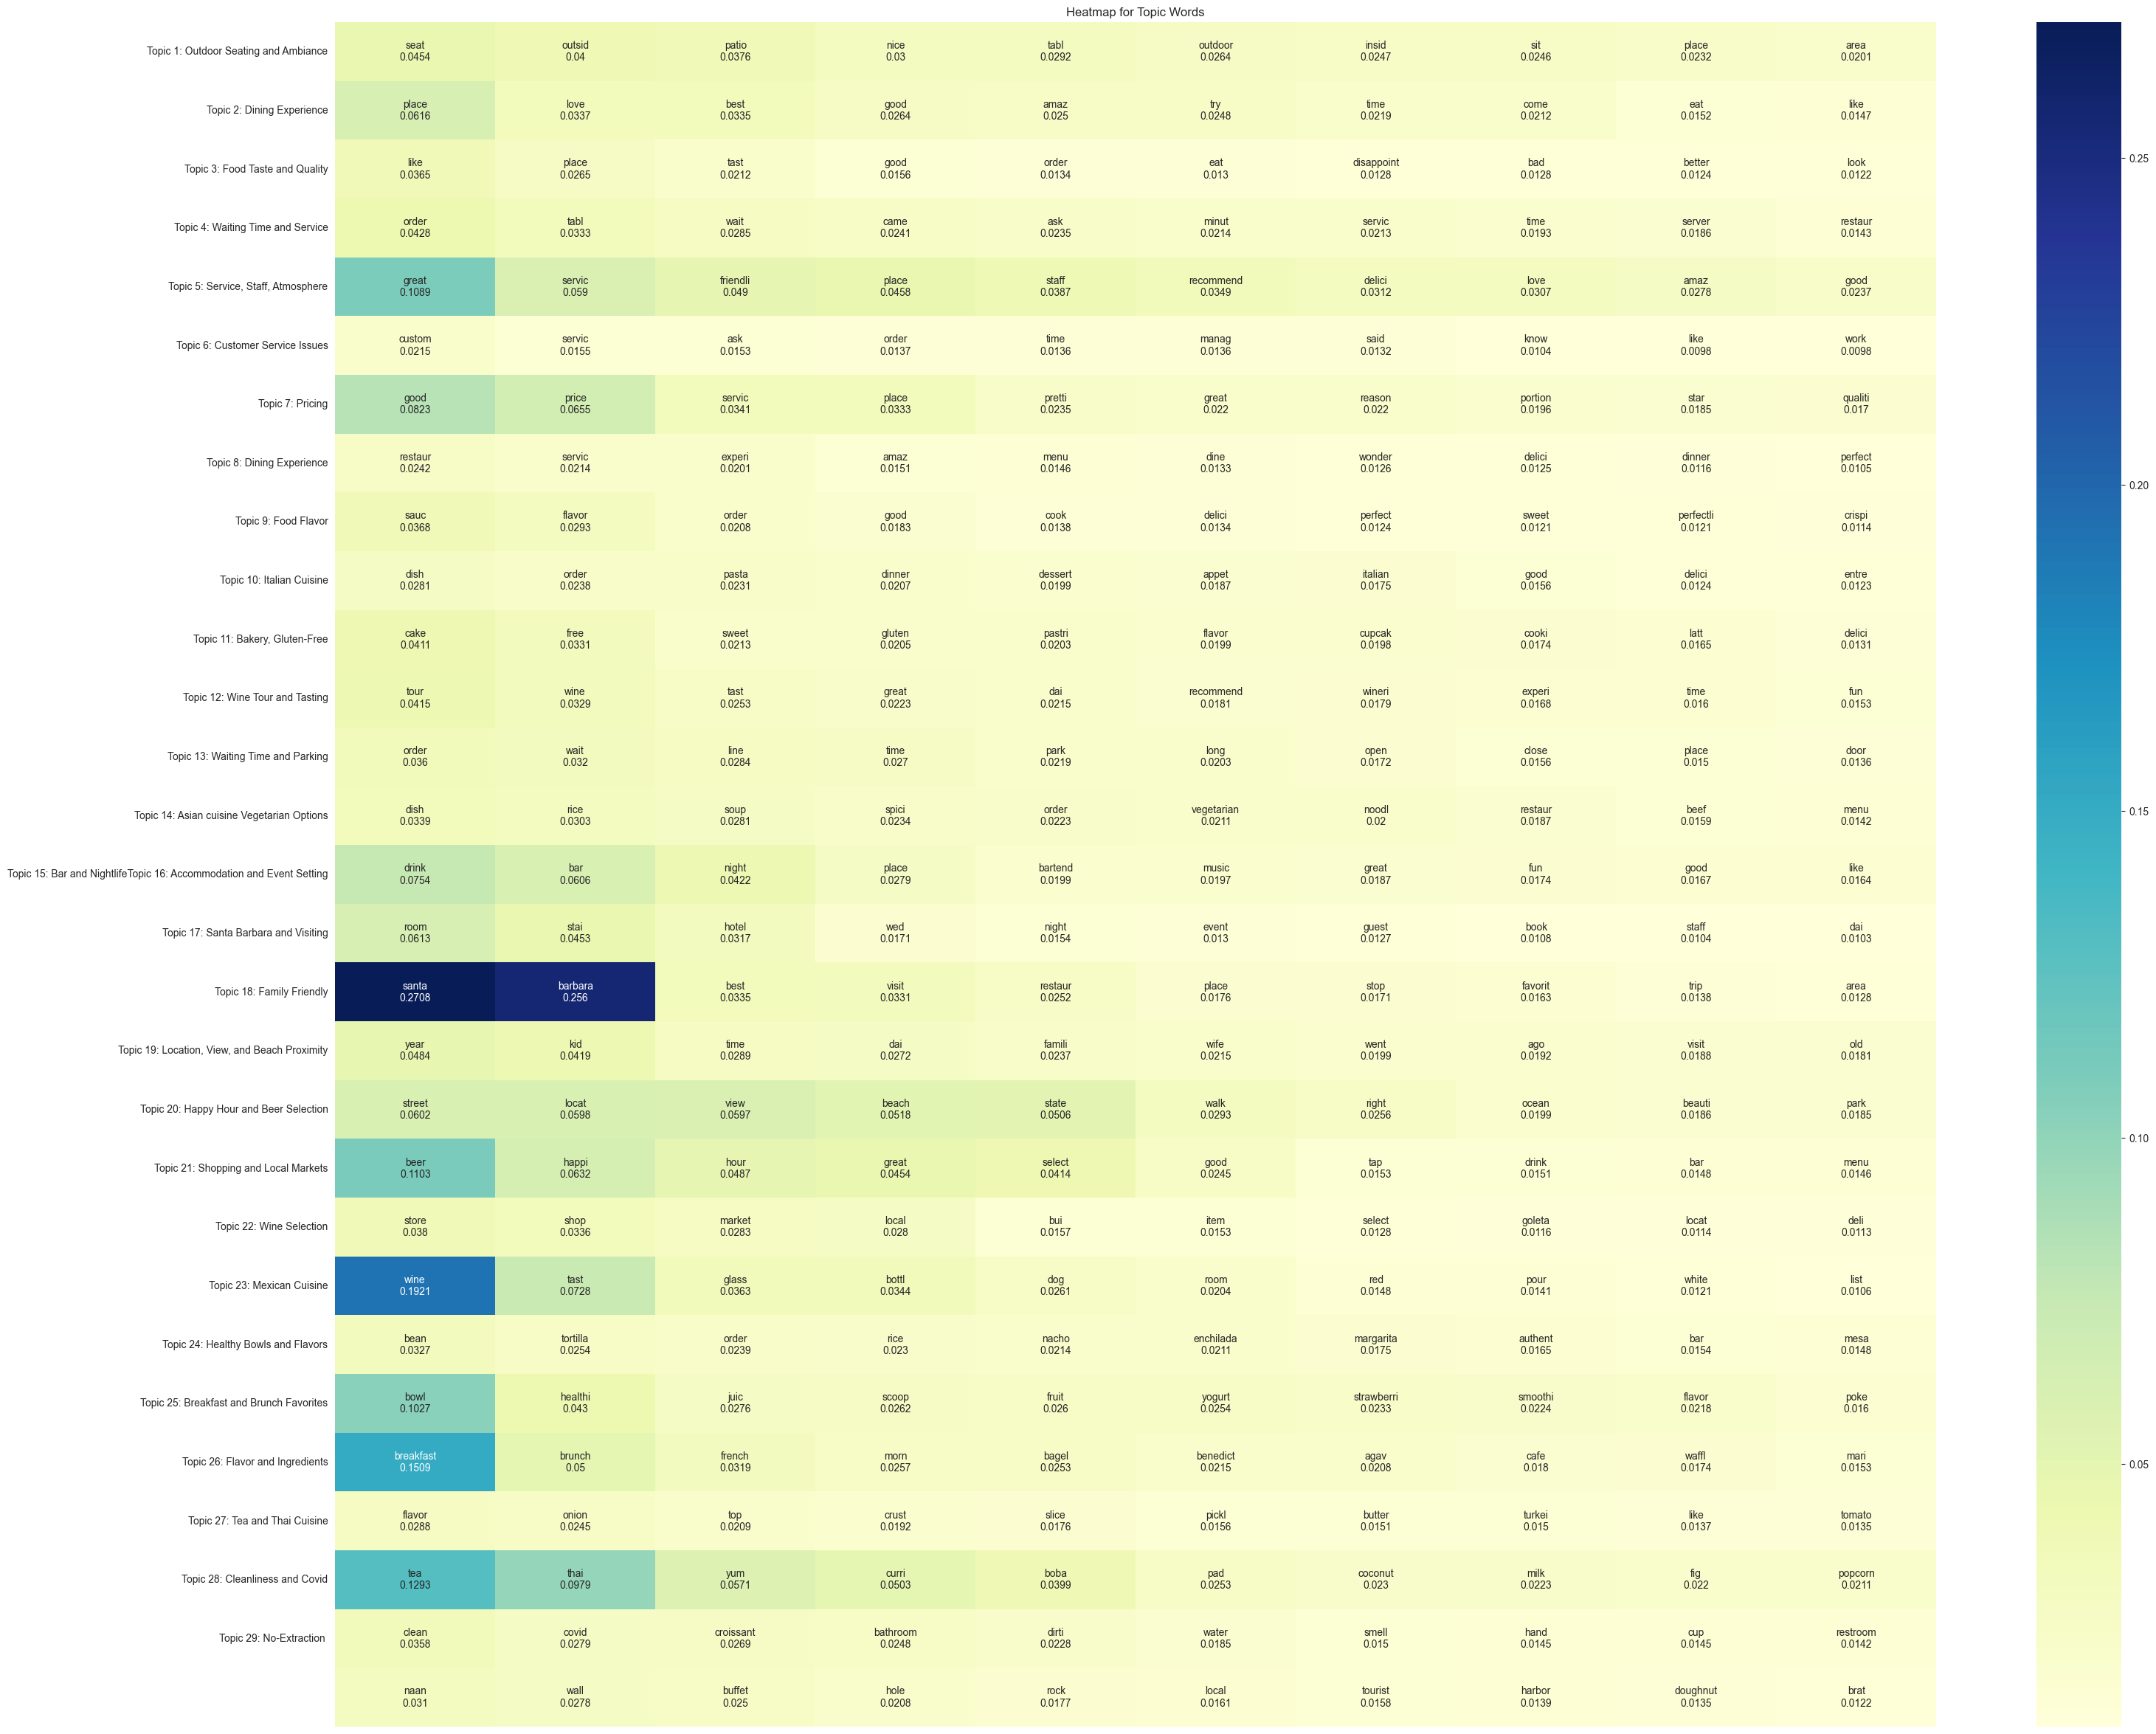

In [25]:
import seaborn as sns
def create_heatmap(top_topics, y_label):
    # avg_coherences = [f'Topic {idx+1}\n({round(i[1],2)})' for idx, i in enumerate(top_topics)]
    result_lst = []
    annot_lst = []
    for idx, row in enumerate(top_topics):
        result_lst.append([])
        annot_lst.append([])
        for j, k in row[0][:10]:
            result_lst[idx].append(round(j,4))
            annot_lst[idx].append(f'''{k}\n{str(round(j,4))}''')
    plt.figure(figsize=(35,30)) 
    plt.title("Heatmap for Topic Words")
    sns.heatmap(pd.DataFrame(result_lst),annot=pd.DataFrame(annot_lst),fmt='',cmap='YlGnBu',
               xticklabels = False, yticklabels = y_label)
LDA_topic_list = topics = [
    "Topic 1: Outdoor Seating and Ambiance",
    "Topic 2: Dining Experience",
    "Topic 3: Food Taste and Quality",
    "Topic 4: Waiting Time and Service",
    "Topic 5: Service, Staff, Atmosphere",
    "Topic 6: Customer Service Issues",
    "Topic 7: Pricing",
    "Topic 8: Dining Experience",
    "Topic 9: Food Flavor",
    "Topic 10: Italian Cuisine",
    "Topic 11: Bakery, Gluten-Free",
    "Topic 12: Wine Tour and Tasting",
    "Topic 13: Waiting Time and Parking",
    "Topic 14: Asian cuisine Vegetarian Options",
    "Topic 15: Bar and Nightlife"
    "Topic 16: Accommodation and Event Setting",
    "Topic 17: Santa Barbara and Visiting",
    "Topic 18: Family Friendly",
    "Topic 19: Location, View, and Beach Proximity",
    "Topic 20: Happy Hour and Beer Selection",
    "Topic 21: Shopping and Local Markets",
    "Topic 22: Wine Selection",  
    "Topic 23: Mexican Cuisine",
    "Topic 24: Healthy Bowls and Flavors",
    "Topic 25: Breakfast and Brunch Favorites",
    "Topic 26: Flavor and Ingredients",
    "Topic 27: Tea and Thai Cuisine",
    "Topic 28: Cleanliness and Covid",
    "Topic 29: No-Extraction "
]


create_heatmap(LDA_optimal_model.top_topics(corpus_removed_labels), LDA_topic_list)

We are find some interesting topics: Topic 11 and Topic 14, Gluten-free and vegetarian option are popular in ca restaurants which are absent in our training dataset; Topic 28, cleanliness and covid is a new topic since 2019.People are more care about the Covid Precautions and cleanliness, which may be a new aspect for restaurants to consider.

** 21 Labels Extracted from LDA model:  Seating, Ambiance,Experience, Waiting Time, Service, Food Taste, Quality, Order, Food Flavor, Gluten-Free Options, Pricing, Vegetarian Options, Nightlife, Events and Setting, Good for Group, Kid friendly, Healthy Options, Location, View, Happy Hour, Cleanliness and Covid Precautions **

##### NMF Model

Num Topics = 18  has Coherence Value of 0.4697
Num Topics = 19  has Coherence Value of 0.4607
Num Topics = 20  has Coherence Value of 0.4578
Num Topics = 21  has Coherence Value of 0.4621
Num Topics = 22  has Coherence Value of 0.4774
Num Topics = 23  has Coherence Value of 0.4688
Num Topics = 24  has Coherence Value of 0.4633
Num Topics = 25  has Coherence Value of 0.4599
Num Topics = 26  has Coherence Value of 0.4757
Num Topics = 27  has Coherence Value of 0.474
Num Topics = 28  has Coherence Value of 0.4625
Num Topics = 29  has Coherence Value of 0.4705
Num Topics = 30  has Coherence Value of 0.4721
Optimal Number of Topics: 22
(17, '0.015*"star" + 0.015*"menu" + 0.014*"better" + 0.014*"night" + 0.014*"price" + 0.013*"dinner" + 0.011*"friend" + 0.011*"thing" + 0.011*"experi" + 0.011*"hour" + 0.011*"happi" + 0.010*"meal" + 0.010*"review" + 0.007*"think" + 0.007*"wai"')
(7, '0.145*"like" + 0.023*"tast" + 0.013*"look" + 0.011*"feel" + 0.011*"flavor" + 0.008*"sauc" + 0.007*"think" + 0.0

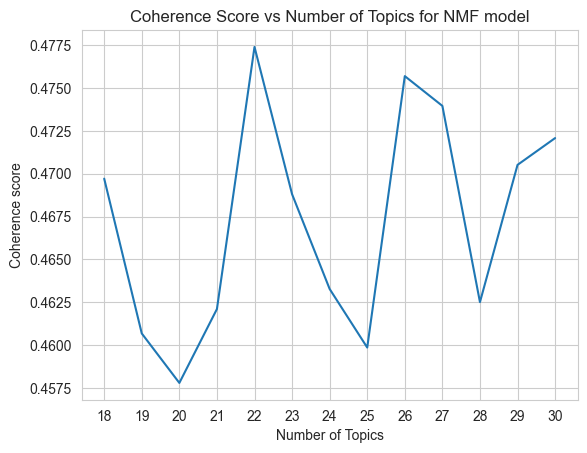

In [22]:
# # plot the coherence score for NMF model
# plot_coherences_topics("NMF", 18, 31, 1, NMF_model_list, NMF_coherence_values)

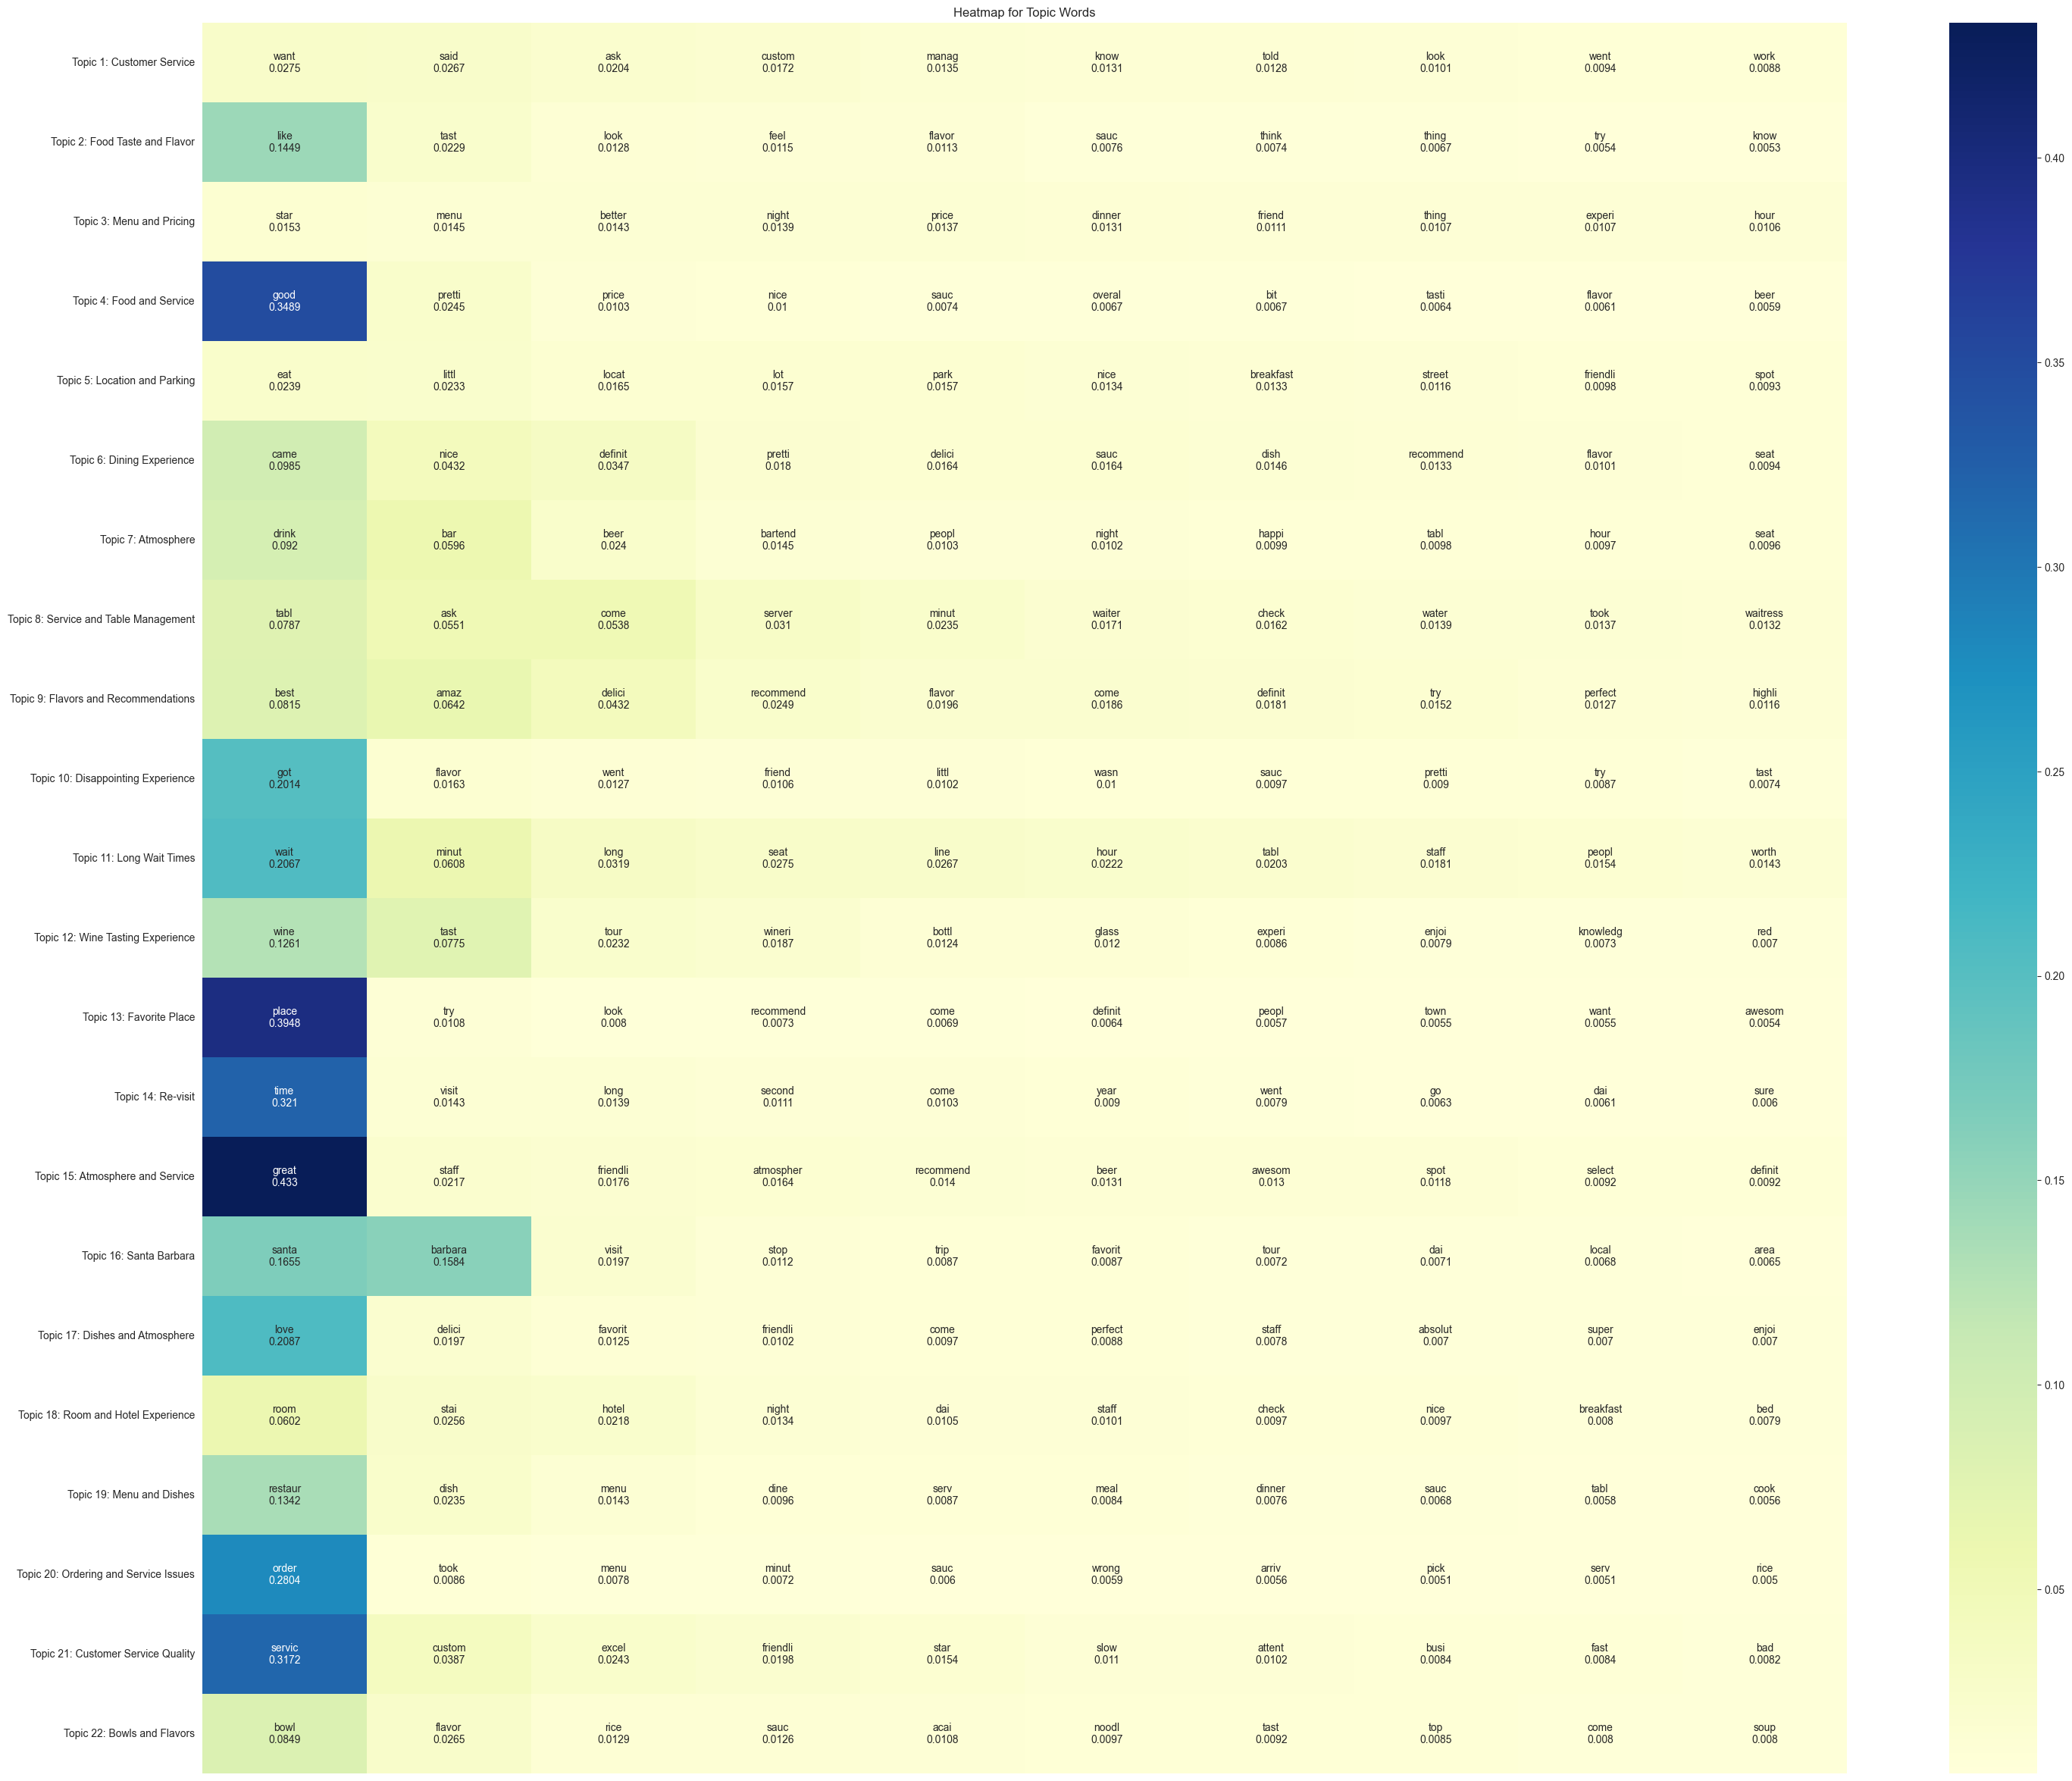

In [23]:
# NMF_optimal_model = NMF_model_list[22-18]
# NMF_topic_list = [
#     "Topic 1: Customer Service",
#     "Topic 2: Food Taste and Flavor",
#     "Topic 3: Menu and Pricing",
#     "Topic 4: Food and Service",
#     "Topic 5: Location and Parking",
#     "Topic 6: Dining Experience",
#     "Topic 7: Atmosphere",
#     "Topic 8: Service and Table Management",
#     "Topic 9: Flavors and Recommendations",
#     "Topic 10: Disappointing Experience",
#     "Topic 11: Long Wait Times",
#     "Topic 12: Wine Tasting Experience",
#     "Topic 13: Favorite Place",
#     "Topic 14: Re-visit",
#     "Topic 15: Atmosphere and Service",
#     "Topic 16: Santa Barbara",
#     "Topic 17: Dishes and Atmosphere",
#     "Topic 18: Room and Hotel Experience",
#     "Topic 19: Menu and Dishes",
#     "Topic 20: Ordering and Service Issues",
#     "Topic 21: Customer Service Quality",
#     "Topic 22: Bowls and Flavors"
# ]
# 
# 
# create_heatmap(NMF_optimal_model.top_topics(corpus_removed_labels),NMF_topic_list)

In [29]:
%%time
from gensim.models import Nmf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

NMF_model_list, NMF_coherence_values = compute_coherence_values(modelname="NMF", dictionary=dictionary_removed_labels, corpus=corpus_removed_labels, texts=ca_df['tokens_removed_labels'], start=18, limit=31, step=1)

Computing coherence for NMF, Num Topics: 30: 100%|██████████| 13/13 [1:05:10<00:00, 300.78s/it]

CPU times: user 8h 18min 33s, sys: 2h 46min 21s, total: 11h 4min 54s
Wall time: 1h 5min 10s


Num Topics = 18  has Coherence Value of 0.4697
Num Topics = 19  has Coherence Value of 0.4607
Num Topics = 20  has Coherence Value of 0.4578
Num Topics = 21  has Coherence Value of 0.4621
Num Topics = 22  has Coherence Value of 0.4774
Num Topics = 23  has Coherence Value of 0.4688
Num Topics = 24  has Coherence Value of 0.4633
Num Topics = 25  has Coherence Value of 0.4599
Num Topics = 26  has Coherence Value of 0.4757
Num Topics = 27  has Coherence Value of 0.474
Num Topics = 28  has Coherence Value of 0.4625
Num Topics = 29  has Coherence Value of 0.4705
Num Topics = 30  has Coherence Value of 0.4721
Optimal Number of Topics: 22
(17, '0.015*"star" + 0.015*"menu" + 0.014*"better" + 0.014*"night" + 0.014*"price" + 0.013*"dinner" + 0.011*"friend" + 0.011*"thing" + 0.011*"experi" + 0.011*"hour" + 0.011*"happi" + 0.010*"meal" + 0.010*"review" + 0.007*"think" + 0.007*"wai"')
(7, '0.145*"like" + 0.023*"tast" + 0.013*"look" + 0.011*"feel" + 0.011*"flavor" + 0.008*"sauc" + 0.007*"think" + 0.0

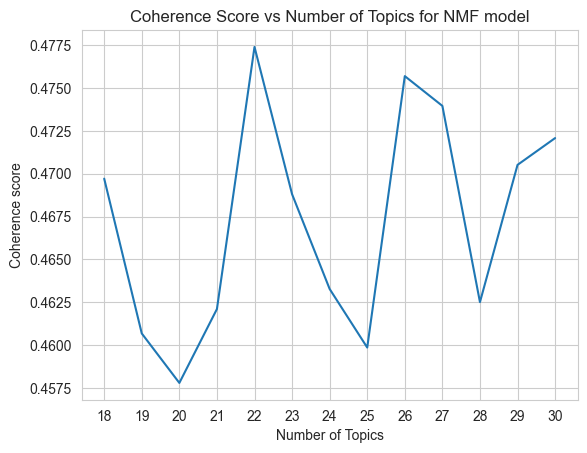

In [30]:
plot_coherences_topics("NMF", 18, 31, 1, NMF_model_list, NMF_coherence_values)

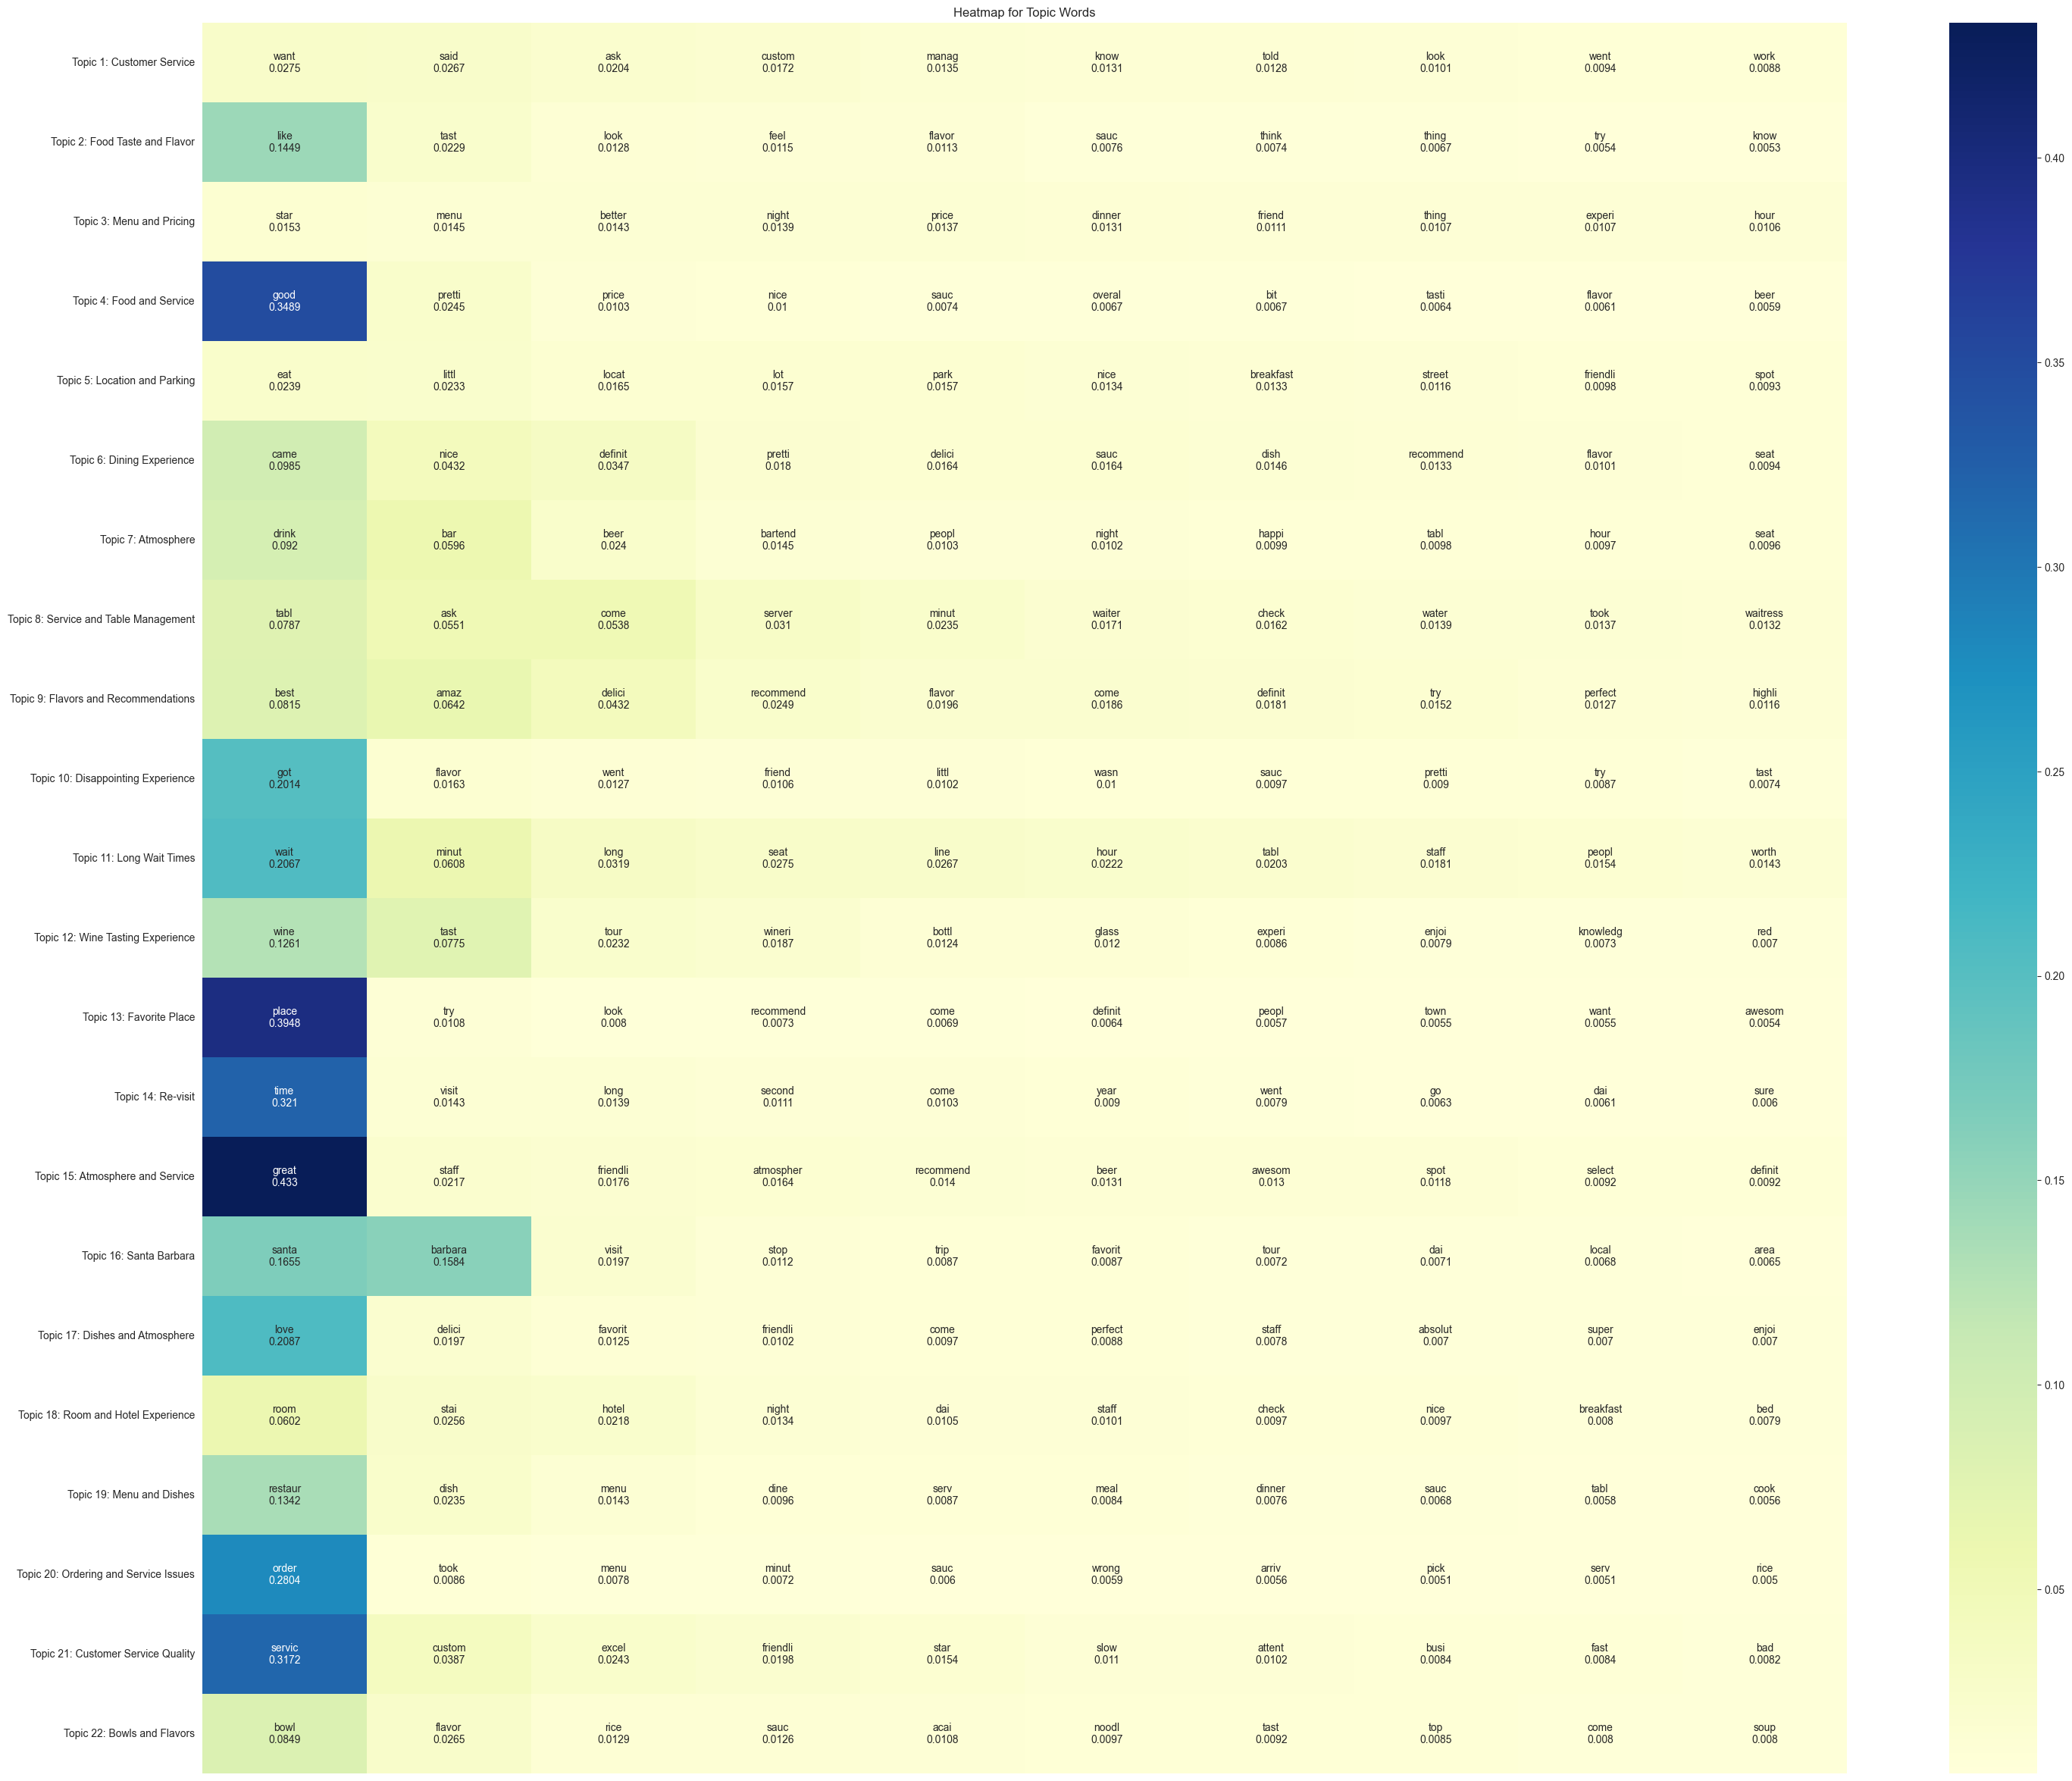

In [31]:
NMF_optimal_model = NMF_model_list[22 - 18]
NMF_topic_list = [
    "Topic 1: Customer Service",
    "Topic 2: Food Taste and Flavor",
    "Topic 3: Menu and Pricing",
    "Topic 4: Food and Service",
    "Topic 5: Location and Parking",
    "Topic 6: Dining Experience",
    "Topic 7: Atmosphere",
    "Topic 8: Service and Table Management",
    "Topic 9: Flavors and Recommendations",
    "Topic 10: Disappointing Experience",
    "Topic 11: Long Wait Times",
    "Topic 12: Wine Tasting Experience",
    "Topic 13: Favorite Place",
    "Topic 14: Re-visit",
    "Topic 15: Atmosphere and Service",
    "Topic 16: Santa Barbara",
    "Topic 17: Dishes and Atmosphere",
    "Topic 18: Room and Hotel Experience",
    "Topic 19: Menu and Dishes",
    "Topic 20: Ordering and Service Issues",
    "Topic 21: Customer Service Quality",
    "Topic 22: Bowls and Flavors"
]

create_heatmap(NMF_optimal_model.top_topics(corpus_removed_labels), NMF_topic_list)

As we can see, most of the topics in the NMF model are presented in LDA model. One more aspect we observed in NMF model is Topic 14 Re-Visit. FINAL_ASPECT_SET is: Seating, Ambiance,Experience, Waiting Time, Service, Food Taste, Quality, Order, Food Flavor, Gluten-Free Options, Pricing, Vegetarian Options, Nightlife, Events and Setting, Good for Group, Kid friendly, Healthy Options, Location, View, Happy Hour, Cleanliness and Covid Precautions, Re-Visit.

In [ ]:
import json
import numpy as np
# data = {"LDA": LDA_optimal_model.top_topics(corpus_removed_labels), "NMF": NMF_optimal_model.top_topics(corpus_removed_labels)}
def convert_float32(obj):
    if isinstance(obj, np.float32):
        return float(obj)
    elif isinstance(obj, list):
        return [convert_float32(item) for item in obj]
    elif isinstance(obj, tuple):
        return tuple(convert_float32(item) for item in obj)
    return obj

data = {
    "LDA": convert_float32(LDA_optimal_model.top_topics(corpus_removed_labels)),
    "NMF": convert_float32(NMF_optimal_model.top_topics(corpus_removed_labels)),
    "LDA_topic_distribution": convert_float32([LDA_optimal_model.get_document_topics(bow) for bow in corpus_removed_labels]),
    "NMF_topic_distribution": convert_float32([NMF_optimal_model.get_document_topics(bow) for bow in corpus_removed_labels]),

}

with open('../data/LDA_NMF_Topics.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)